In [118]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('bmh')

In [119]:
# A training model using linear regression

def mean(arr):
    """Returns mean of array"""
    
    return sum(arr)/len(arr)

def findCoefs(xs, ys):
    """Find correlation b/n xs and ys"""
    
    m = ( (mean(xs)*mean(ys) - mean(xs*ys)) / 
         (mean(xs)**2 - mean(xs**2)) )
    
    b = mean(ys) - m*mean(xs)
    
    return np.array([m, b])

def predict(xs, ys, test=None):
    
    coefs = findCoefs(xs, ys)
    ys = [(coefs[0]*x+coefs[1]) for x in test]
    
    return ys

In [128]:
df = pd.read_csv("GOOG.csv")
df = df[["Close"]]
df["Prediction"] = df["Close"].shift(-30)

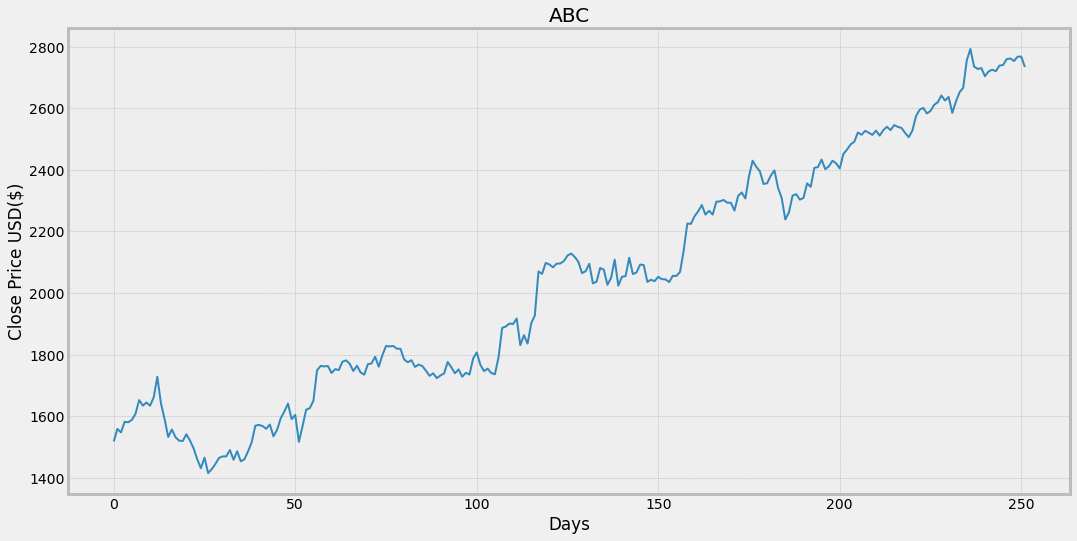

In [129]:
# Visialize the close price data
plt.figure(figsize=(16,8))
plt.title("ABC")
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.show()

In [130]:
X = np.array(df["Close"])[:-30]
y = np.array(df["Prediction"])[:-30]

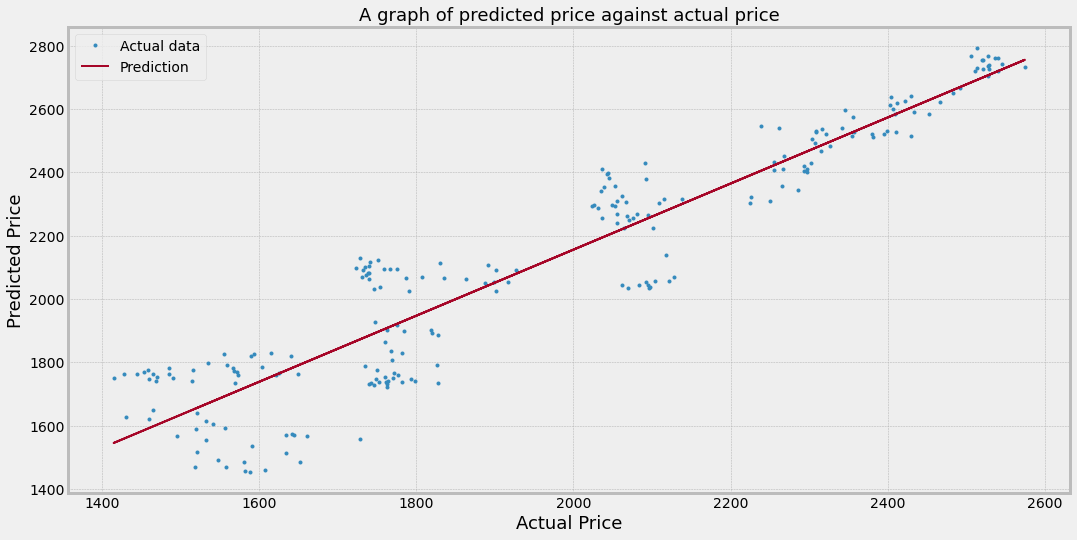

In [131]:
# Visualize the Target price and the actual price (Close Price)
x = X[:]
coefs = findCoefs(X, y)
predict1 = [(coefs[0]*i+coefs[1]) for i in x]
plt.figure(figsize=(16,8))
plt.title("A graph of predicted price against actual price", fontsize=18)
plt.xlabel("Actual Price", fontsize=18)
plt.ylabel("Predicted Price", fontsize=18)
plt.plot(x, y, '.')
plt.plot(x, predict1)
plt.legend(["Actual data","Prediction"])

In [132]:
test_X = np.array(X[-30:])
pred = predict(X, y, test=test_X)
pred

[2516.194356324002,
 2580.4638044165886,
 2582.969188527506,
 2608.5016343216703,
 2576.121494645592,
 2585.5683570313095,
 2604.618556487616,
 2595.714514138669,
 2578.313673644364,
 2627.530937013981,
 2642.489339431758,
 2659.984217973659,
 2668.908901344198,
 2700.4332716137624,
 2692.426795330859,
 2706.1117352346137,
 2699.4518617054873,
 2692.426795330859,
 2706.5082747918777,
 2689.733844521864,
 2708.2621207053953,
 2719.629496851019,
 2708.3976975824244,
 2725.5271285802683,
 2719.5354588034243,
 2715.8715480339206,
 2699.149360195819,
 2684.4832650823464,
 2706.456286014677,
 2755.527267860939]

In [133]:
df["Prediction"][-30:] = pred
df

,Close,Prediction
0,1517.979980,1469.329956
1,1558.599976,1469.599976
2,1547.530029,1490.089966
3,1581.750000,1458.420044
4,1580.420044,1486.020020
...,...,...
247,2761.929932,2715.871548
248,2753.790039,2699.149360
249,2767.790039,2684.483265
250,2768.120117,2706.456286


Text(0, 0.5, 'Price')

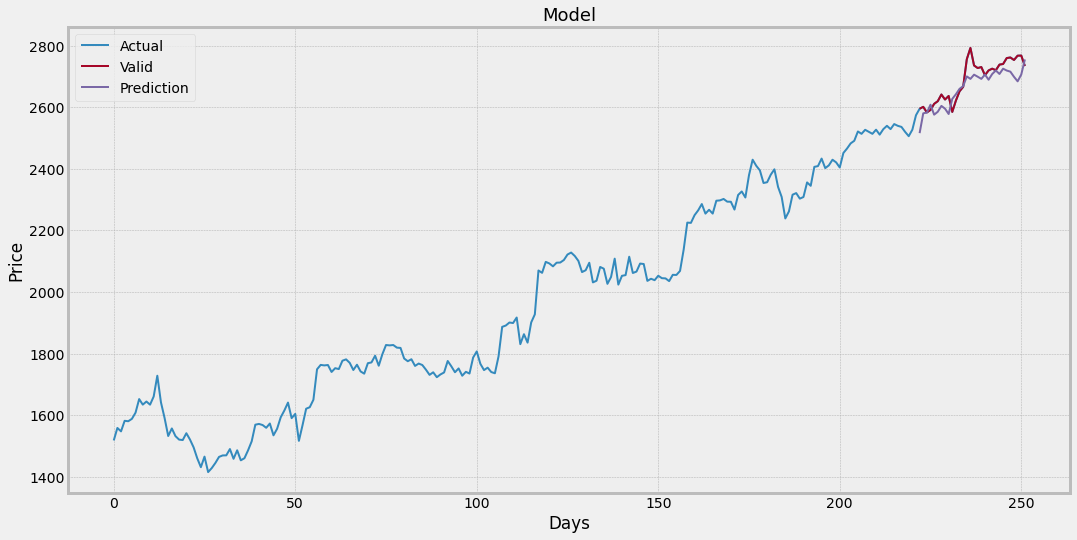

In [134]:
plt.figure(figsize=(16,8))
plt.plot(df["Close"])
plt.plot(df["Close"][-30:])
plt.plot(df["Prediction"][-30:])
plt.legend(["Actual", "Valid", "Prediction"])
plt.title("Model", fontsize=18)
plt.xlabel("Days")
plt.ylabel("Price")